# 0. Functions and libraries

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Confusion matrix display
def confusion_matrix_dis(confusionMatrix):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False,True])
    cm_display.plot()
    plt.show()

# Display all metrics
def metrics_values(actual,predicted):
    Accuracy = metrics.accuracy_score(actual,predicted)
    Precision = metrics.precision_score(actual,predicted, pos_label = 'M')
    Sensitivity = metrics.recall_score(actual,predicted, pos_label = 'M')
    Specificity = metrics.recall_score(actual,predicted,pos_label = 'B')
    F_score = metrics.f1_score(actual,predicted, pos_label = 'M')
    print("Accuracy:", round(Accuracy,3), "\nPrecision:", round(Precision,3),"\nSensitivity:", 
          round(Sensitivity,3),"\nSpecificity:", round(Specificity,3),"\nF1_score:", round(F_score,3))

# 1. Data import

In [11]:
# Read in data file
file_name = 'glass.data'
glass = pd.read_csv(file_name, delimiter=',', 
                    header=None, names=['ID', 'RI', 'NA2O','MGO','AL2O3','SIO2','K2O','CAO',
                                       'BAO','FE2O3','TYPE'])

# Display contents
glass.head()

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
# View data structure
# 214 instances, 11 features
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   NA2O    214 non-null    float64
 3   MGO     214 non-null    float64
 4   AL2O3   214 non-null    float64
 5   SIO2    214 non-null    float64
 6   K2O     214 non-null    float64
 7   CAO     214 non-null    float64
 8   BAO     214 non-null    float64
 9   FE2O3   214 non-null    float64
 10  TYPE    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [13]:
# Remove ID feature
glass.drop('ID', axis = 1, inplace = True)
glass.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
# Count number of instances for each class
glass.TYPE.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: TYPE, dtype: int64

In [21]:
# Show as percentage
(glass.TYPE.value_counts()/glass.TYPE.count()).sort_index()

1    0.327103
2    0.355140
3    0.079439
5    0.060748
6    0.042056
7    0.135514
Name: TYPE, dtype: float64

In [23]:
# Check data type
glass.TYPE.dtype

dtype('int64')

In [24]:
# Recode as categorical
glass['TYPE'] = glass['TYPE'].astype('category')

In [25]:
# Confirm recode
glass.TYPE.dtype

CategoricalDtype(categories=[1, 2, 3, 5, 6, 7], ordered=False)

In [26]:
# Recheck structure
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   NA2O    214 non-null    float64 
 2   MGO     214 non-null    float64 
 3   AL2O3   214 non-null    float64 
 4   SIO2    214 non-null    float64 
 5   K2O     214 non-null    float64 
 6   CAO     214 non-null    float64 
 7   BAO     214 non-null    float64 
 8   FE2O3   214 non-null    float64 
 9   TYPE    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [30]:
# Summary of numerical features
glass.describe()
glass.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2. Data normalization

In [33]:
# Normalize data
glass_n = pd.DataFrame(preprocessing.minmax_scale(glass.iloc[:,:9]), columns=glass.columns[:9])

glass_n.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [34]:
# Verify normalization
glass_n.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Train a model on the data

In [47]:
train_N = int(np.floor(glass.shape[0] * .8))

171


,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.0,3
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.0,2
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.0,7
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0,5


In [50]:
# Training and test set
glass_train_n = glass.sample(n=train_N)

# Get indices of the randomly selected rows
random_indices = glass_train_n.index

# Create a data frame excluding the randomly selected rows
glass_test_n  = glass.drop(random_indices)

glass_train_n.info()
glass_test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 16 to 72
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      171 non-null    float64 
 1   NA2O    171 non-null    float64 
 2   MGO     171 non-null    float64 
 3   AL2O3   171 non-null    float64 
 4   SIO2    171 non-null    float64 
 5   K2O     171 non-null    float64 
 6   CAO     171 non-null    float64 
 7   BAO     171 non-null    float64 
 8   FE2O3   171 non-null    float64 
 9   TYPE    171 non-null    category
dtypes: category(1), float64(9)
memory usage: 13.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 211
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      43 non-null     float64 
 1   NA2O    43 non-null     float64 
 2   MGO     43 non-null     float64 
 3   AL2O3   43 non-null     float64 
 4   SIO2    43 non-null     float64 
 5   K2O     43

In [183]:
# Training and test set labels
wbcd_train_labels = wbcd.iloc[:469,0]
wbcd_test_labels = wbcd.iloc[470:,0]

In [184]:
# Set KNN alg, start with k = 21 sqrt(instances)
knn = KNeighborsClassifier(n_neighbors=21)

In [185]:
# Train model
knn.fit(wbcd_train_n, wbcd_train_labels)

KNeighborsClassifier(n_neighbors=21)

In [186]:
# Predict test set
wbcd_test_pred = knn.predict(wbcd_test_n)

#### 4. Model evaluation

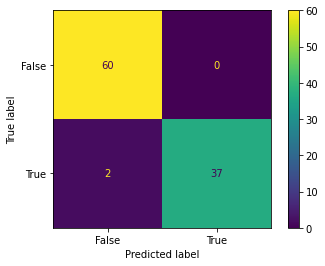

Accuracy: 0.98 
Precision: 1.0 
Sensitivity: 0.949 
Specificity: 1.0 
F1_score: 0.974


In [187]:
confusion_matrix = metrics.confusion_matrix(wbcd_test_labels, wbcd_test_pred)
confusion_matrix_dis(confusion_matrix)
metrics_values(wbcd_test_labels, wbcd_test_pred)

# 5. Improve performance

## a. Change normalization method to z-score standardization

In [188]:
#Apply scale 
wbcd_z = pd.DataFrame(preprocessing.scale(wbcd.iloc[:,1:]))
wbcd_z.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.287781e-16,-7.373520e-16,-1.303390e-16,-2.239958e-16,1.660457e-16,1.882891e-16,5.112099e-17,-4.760886e-17,1.465338e-16,-1.517240e-15,...,-8.507157e-17,6.634022e-18,-3.570665e-16,-1.888745e-16,-2.234104e-16,7.999850e-18,9.033976e-17,2.224348e-16,2.734583e-16,1.851672e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [189]:
wbcd_train_z = wbcd_z.iloc[:469, ]
wbcd_test_z  = wbcd_z.iloc[470:, ]

In [190]:
knn.fit(wbcd_train_z, wbcd_train_labels)

KNeighborsClassifier(n_neighbors=21)

In [191]:
wbcd_test_pred = knn.predict(wbcd_test_z)

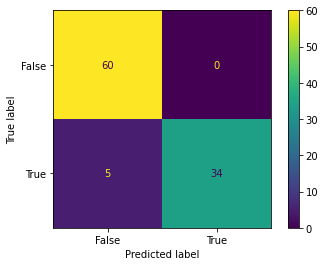

Accuracy: 0.949 
Precision: 1.0 
Sensitivity: 0.872 
Specificity: 1.0 
F1_score: 0.932


In [192]:
confusion_matrix = metrics.confusion_matrix(wbcd_test_labels, wbcd_test_pred)
confusion_matrix_dis(confusion_matrix)
metricsValues(wbcd_test_labels, wbcd_test_pred)

## b. Approach 2: Sensitivity analysis for k

k =  1


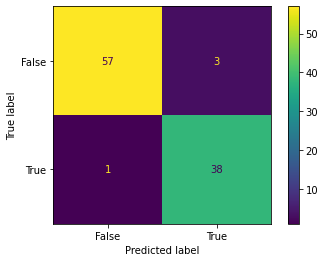

Accuracy: 0.96 
Precision: 0.927 
Sensitivity: 0.974 
Specificity: 0.95 
F1_score: 0.95
**************************************************
k =  5


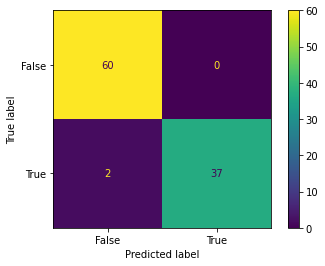

Accuracy: 0.98 
Precision: 1.0 
Sensitivity: 0.949 
Specificity: 1.0 
F1_score: 0.974
**************************************************
k =  11


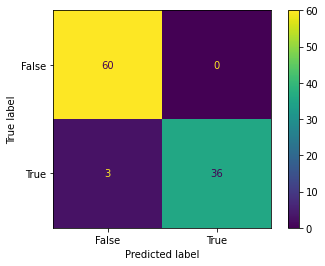

Accuracy: 0.97 
Precision: 1.0 
Sensitivity: 0.923 
Specificity: 1.0 
F1_score: 0.96
**************************************************
k =  15


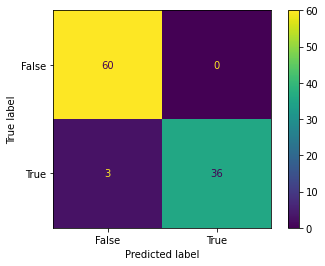

Accuracy: 0.97 
Precision: 1.0 
Sensitivity: 0.923 
Specificity: 1.0 
F1_score: 0.96
**************************************************
k =  21


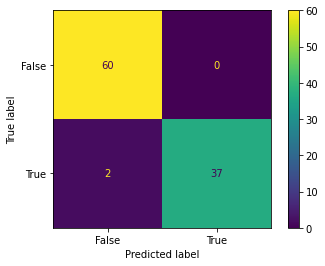

Accuracy: 0.98 
Precision: 1.0 
Sensitivity: 0.949 
Specificity: 1.0 
F1_score: 0.974
**************************************************
k =  27


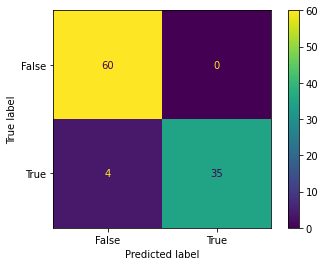

Accuracy: 0.96 
Precision: 1.0 
Sensitivity: 0.897 
Specificity: 1.0 
F1_score: 0.946
**************************************************


In [193]:
# Set of k's to train/test
kList = [1, 5, 11, 15, 21, 27]

# Loop through all k's and display confusion matrix and metrics
for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Using min-max normalized data
    knn.fit(wbcd_train_n, wbcd_train_labels)
    wbcd_test_pred = knn.predict(wbcd_test_n)
    print("k = ", k)
    confusion_matrix = metrics.confusion_matrix(wbcd_test_labels, wbcd_test_pred)
    confusion_matrix_dis(confusion_matrix)
    metricsValues(wbcd_test_labels, wbcd_test_pred)
    print("**************************************************")